In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
from math import sqrt
from scipy.io import loadmat
import scipy

import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader 
from tqdm.auto import tqdm
import random
import utils
import os

In [2]:
print(torch.cuda.is_available())
if torch.cuda.is_available():  
    dev = "cuda" 
    map_location=None
else:  
    dev = "cpu"  
    map_location='cpu'
device = torch.device(dev)  

True


In [3]:
path=os.getcwd()+'\\'
print("path: ",path)

path:  c:\Users\Laura\Desktop\Laura\Istruzione\Data Science\Sismologia\Paper\codes\final_codes\forecasting\


In [4]:
mdl="TF_PRETR" #"TF" or "TF_PRETR" or "LSTM" or "TCN"
exp=4679 #4679 or 5198 or 4581
if exp==4581:
  MechData = loadmat(path+'MechData_p4581.mat')
  d=MechData['ShearStress']
  d = np.append(d, MechData['Time'], axis = 1)
  columns = ['ShearStress', 'Time']
  data = pd.DataFrame(d, columns=columns)
  newDFf=data[["ShearStress","Time"]][2200000:2490000]
  newDFf=newDFf.reset_index()
  newDFf=newDFf.drop(['index'], axis=1)
elif exp==5198:
  MechData = loadmat(path+'p5198_MechData.mat')
  d=MechData['ShearStress']
  d = np.append(d, MechData['Time'], axis = 1)
  columns = ['ShearStress', 'Time']
  data = pd.DataFrame(d, columns=columns)
  newDFf=data[["ShearStress","Time"]][3688000:3990000]
  newDFf=newDFf.reset_index()
  newDFf=newDFf.drop(['index'], axis=1)
elif exp==4679:
  MechData = loadmat(path+'p4679_MechData.mat')
  d=MechData['ShearStress']
  d = np.append(d, MechData['Time'], axis = 1)
  columns = ['ShearStress', 'Time']
  data = pd.DataFrame(d, columns=columns)
  newDFf=data[["ShearStress","Time"]][2225000:2525000]
  newDFf=newDFf.reset_index()
  newDFf=newDFf.drop(['index'], axis=1)
else:
  print("Experiment not valid. Chose 4581 or 5198 or 4679.")
newDFf

,ShearStress,Time
0,4.984201,4234.989000
1,4.984267,4234.990000
2,4.984008,4234.991000
3,4.984361,4234.992000
4,4.984604,4234.993000
...,...,...
299995,4.979515,4534.984001
299996,4.979753,4534.985001
299997,4.979648,4534.986001
299998,4.979725,4534.987001


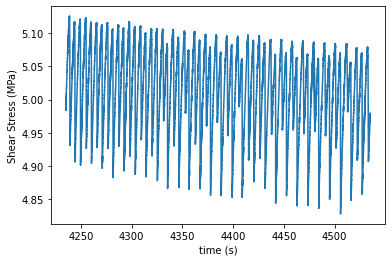

In [5]:
plt.plot(newDFf["Time"],newDFf["ShearStress"])
plt.xlabel('time (s)')
plt.ylabel('Shear Stress (MPa)')
plt.show()

A plot of example:


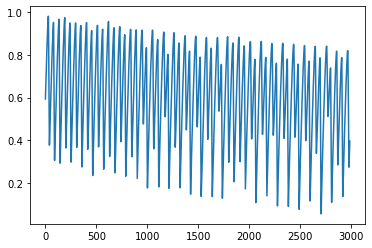

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.586103,0.586276,0.586449,0.586622,0.586795,0.586968,0.587141,0.587314,0.587487,0.587660,...,0.601641,0.601812,0.601984,0.602155,0.602326,0.602497,0.602668,0.602839,0.603010,0.603181
1,0.603353,0.603524,0.603694,0.603865,0.604037,0.604209,0.604379,0.604550,0.604721,0.604892,...,0.618698,0.618867,0.619037,0.619206,0.619376,0.619545,0.619714,0.619884,0.620053,0.620223
2,0.620393,0.620561,0.620730,0.620899,0.621069,0.621238,0.621407,0.621576,0.621745,0.621914,...,0.635582,0.635750,0.635919,0.636087,0.636256,0.636424,0.636592,0.636761,0.636930,0.637098
3,0.637267,0.637435,0.637604,0.637772,0.637940,0.638108,0.638276,0.638445,0.638613,0.638781,...,0.652335,0.652502,0.652670,0.652837,0.653005,0.653172,0.653339,0.653506,0.653673,0.653840
4,0.654007,0.654173,0.654341,0.654508,0.654675,0.654843,0.655010,0.655176,0.655343,0.655510,...,0.668987,0.669152,0.669318,0.669483,0.669649,0.669815,0.669980,0.670146,0.670311,0.670477
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2985,0.324049,0.324209,0.324368,0.324527,0.324686,0.324845,0.325005,0.325164,0.325323,0.325483,...,0.338429,0.338589,0.338750,0.338910,0.339070,0.339230,0.339390,0.339550,0.339711,0.339872
2986,0.340033,0.340193,0.340354,0.340515,0.340675,0.340836,0.340997,0.341157,0.341318,0.341479,...,0.354527,0.354688,0.354849,0.355009,0.355171,0.355332,0.355493,0.355654,0.355815,0.355977
2987,0.356138,0.356299,0.356461,0.356622,0.356783,0.356944,0.357105,0.357267,0.357428,0.357591,...,0.370649,0.370810,0.370971,0.371131,0.371292,0.371453,0.371613,0.371774,0.371935,0.372096
2988,0.372257,0.372418,0.372579,0.372740,0.372900,0.373061,0.373221,0.373382,0.373543,0.373703,...,0.386685,0.386845,0.387005,0.387165,0.387325,0.387485,0.387645,0.387805,0.387965,0.388125


In [6]:
min_max_scaler = preprocessing.MinMaxScaler()
x = newDFf[:int(len(newDFf)*0.7)].values
min_max_scaler.fit(x)
x_scaled = min_max_scaler.transform(newDFf.values)
newDF_scaled = pd.DataFrame(x_scaled)
newDF=utils.CreateSubwindows(newDF_scaled[0])
newDF

In [7]:
steps_in=200 
steps_out=100 
batch_size = 32
tr_dl, val_dl, test_dl=utils.train_val_test_split(newDF, train_percentage=0.70, val_percentage=0.10, test_percentage=0.20, window_shift=10, batch_size=batch_size,steps_in=steps_in, steps_out=steps_out)

training_set.shape:  (2093, 100)  val_set.shape:  (499, 100)  test_set.shape:  (698, 100)
X_train.shape:  (18000, 200, 1)  y_train.shape:  (18000, 99, 1)  label_train.shape:  (18000, 100, 1)
X_val.shape:  (2000, 200, 1)  y_val.shape:  (2000, 99, 1)  label_val.shape:  (2000, 100, 1)
X_test.shape:  (4000, 200, 1)  y_test.shape:  (4000, 99, 1)  label_test.shape:  (4000, 100, 1)


In [8]:
loss_function = utils.RMSELoss()
min_loss = np.Inf
num_epochs = 30
loss_history_tr = []
loss_history_val = []
loss_history_te = []
learning_rate = 0.0001
init_lr = learning_rate
lr_decay = 0.99

if mdl=="TF":
  obs=steps_in
  preds=steps_out
  emb_size=128 
  heads=4
  layers=2
  dropout=0.1
  factor=0.1
  warmup=1
  #outputteTF=[]
  model=utils.IndividualTF(1, 2, 2, N=layers, d_model=emb_size, d_ff=256, h=heads, dropout=dropout).to(device)
  best_model=type(model)(1, 2,2, N=layers, d_model=emb_size, d_ff=256, h=heads, dropout=dropout).to(device)
  optimizer = utils.NoamOpt(emb_size, factor, len(tr_dl)*warmup, torch.optim.Adam(model.parameters(), lr=0.001, betas=(0.9, 0.98), eps=1e-9))

elif mdl=="TF_PRETR":
  obs=steps_in
  preds=steps_out
  emb_size=128 
  heads=4
  layers=2
  dropout=0.1
  factor=0.1
  warmup=1
  #outputteTF_PRETR=[]
  model=utils.IndividualTF(1, 2, 2, N=layers, d_model=emb_size, d_ff=256, h=heads, dropout=dropout).to(device)
  if exp==4581:
    model.load_state_dict(torch.load(path+"TF_pretrained_bestmodel_epoch1.pt"))
  elif exp==5198 or exp==4679:
    model.load_state_dict(torch.load(path+"TF_pretrained_bestmodel_epoch2.pt"))  
  else:
    print("Model not available for this experiment")
  best_model=type(model)(1, 2,2, N=layers, d_model=emb_size, d_ff=256, h=heads, dropout=dropout).to(device)
  optimizer = utils.NoamOpt(emb_size, factor, len(tr_dl)*warmup, torch.optim.Adam(model.parameters(), lr=0.001, betas=(0.9, 0.98), eps=1e-9))

elif mdl=="LSTM":
  inp_size=1
  out_size=1
  num_layers = 3
  hidden_size = 300 
  #outputteLSTM=[]
  model = utils.LSTM(input_size=inp_size, hidden_size=hidden_size, output_size=out_size, num_layers=num_layers).to(device)
  optimizer = torch.optim.Adam(model.parameters(), lr=0.0001, weight_decay=0.001)
  best_model = type(model)(input_size=inp_size, hidden_size=hidden_size, output_size=out_size, num_layers=num_layers).to(device)

elif mdl=="TCN":
  inp_size=steps_in
  out_size=1
  hidden_size1 = 64
  hidden_size2 = 256
  model = utils.TCN(input_size=inp_size, hidden_size1=hidden_size1, hidden_size2=hidden_size2, output_size=out_size).to(device)
  optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=0.001)
  best_model = type(model)

else:
  print("Experiment not valid. Chose TF or LSTM or TCN")

In [9]:
for epoch in range(num_epochs):
    
    model.train()
    sum_loss_tr = 0

    for idx, batch in tqdm(enumerate(tr_dl), total=len(tr_dl)):
        model.zero_grad()
        label = batch[2].to(device) 
        inp = batch[0].to(device)
        target = batch[1].to(device)
        
        if mdl=="TF" or mdl=="TF_PRETR":
          target_c=torch.zeros((target.shape[0],target.shape[1],1)).to(device)
          target=torch.cat((target,target_c),-1)
          start_of_seq = torch.Tensor([0, 1]).unsqueeze(0).unsqueeze(1).repeat(target.shape[0],1,1).to(device)
          dec_inp = torch.cat((start_of_seq, target), 1)
          src_att = torch.ones((inp.shape[0], 1, inp.shape[1])).to(device)
          trg_att=utils.subsequent_mask(dec_inp.shape[1]).repeat(dec_inp.shape[0],1,1).to(device)
          output=model(inp, dec_inp, src_att, trg_att)[:,:,0].unsqueeze(2)
        else: #"LSTM" or "TCN"
          output = model(inp.float(), target.float(), batch_size=batch_size, steps_in=steps_in, steps_out=steps_out, tf_prob=1)
        current_loss = loss_function(output, label) 
        current_loss.backward()
        if mdl=="TF" or mdl=="TF_PRETR":
          optimizer.optimizer.step()
        else:
          optimizer.step()
        sum_loss_tr += (current_loss.item()**2)*batch_size

    curr_tr_loss = np.sqrt(sum_loss_tr/len(tr_dl))
    loss_history_tr.append(curr_tr_loss)

    model.eval()
    with torch.no_grad():
        sum_loss_val = 0

        for idx, batch in tqdm(enumerate(val_dl), total=len(val_dl)):
            label = batch[2].to(device)
            inp = batch[0].to(device)
            target = batch[1].to(device)
            if mdl=="TF" or mdl=="TF_PRETR":
              target_c=torch.zeros((target.shape[0],target.shape[1],1)).to(device)
              target=torch.cat((target,target_c),-1)
              start_of_seq = torch.Tensor([0, 1]).unsqueeze(0).unsqueeze(1).repeat(target.shape[0],1,1).to(device)
              dec_inp = start_of_seq
              src_att = torch.ones((inp.shape[0], 1,inp.shape[1])).to(device)
              for i in range(0,steps_out):
                  trg_att = utils.subsequent_mask(dec_inp.shape[1]).repeat(dec_inp.shape[0], 1, 1).to(device)
                  output = model(inp, dec_inp, src_att, trg_att)
                  last_output = torch.cat((output[:,-1:,0].unsqueeze(2), torch.zeros_like(output[:,-1:,0].unsqueeze(2))), 2)
                  dec_inp = torch.cat((dec_inp, last_output), 1)
              preds = dec_inp[:, 1:, 0].unsqueeze(2) 
              sum_loss_val += (loss_function(preds, label).item()**2)*batch_size
            else: #"LSTM" or "TCN"
              output = model(inp.float(), target.float(), batch_size=batch_size, steps_in=steps_in, steps_out=steps_out, tf_prob=0)
              sum_loss_val += (loss_function(output, label).item()**2)*batch_size
  
        curr_val_loss = np.sqrt(sum_loss_val/len(val_dl))
        loss_history_val.append(curr_val_loss)

        if curr_val_loss < min_loss:
            min_loss = curr_val_loss
            del best_model
            if mdl=="TF": 
                best_model = type(model)(1, 2,2, N=layers, d_model=emb_size, d_ff=256, h=heads, dropout=dropout).to(device)
                best_model.load_state_dict(model.state_dict())
                torch.save(best_model.state_dict(), "TF_bestmodel.pt")
            if mdl=="TF_PRETR": 
                best_model = type(model)(1, 2,2, N=layers, d_model=emb_size, d_ff=256, h=heads, dropout=dropout).to(device)
                best_model.load_state_dict(model.state_dict())
                torch.save(best_model.state_dict(), "TF_withPretraining_bestmodel.pt")
            elif mdl=="LSTM":
                best_model = type(model)(input_size=inp_size, hidden_size=hidden_size, output_size=out_size, num_layers=num_layers)
                best_model.load_state_dict(model.state_dict())
                torch.save(best_model.state_dict(), "LSTM_bestmodel.pt")
            elif mdl=="TCN":
                best_model = type(model)(input_size=inp_size, hidden_size1=hidden_size1, hidden_size2=hidden_size2, output_size=out_size)
                best_model.load_state_dict(model.state_dict())
                torch.save(best_model.state_dict(), "TCN_bestmodel.pt")
            print("Best Epoch:", epoch+1)

    model.eval()
    with torch.no_grad():

        sum_loss_te = 0 
        for idx, batch in tqdm(enumerate(test_dl), total=len(test_dl)):
            label = batch[2].to(device)
            inp = batch[0].to(device)
            target = batch[1].to(device)
            if mdl=="TF" or mdl=="TF_PRETR": 
                target_c=torch.zeros((target.shape[0],target.shape[1],1)).to(device)
                target=torch.cat((target,target_c),-1)
                start_of_seq = torch.Tensor([0, 1]).unsqueeze(0).unsqueeze(1).repeat(target.shape[0],1,1).to(device)
                src_att = torch.ones((inp.shape[0], 1,inp.shape[1])).to(device)
                dec_inp = start_of_seq
                for i in range(0,steps_out):
                    trg_att = utils.subsequent_mask(dec_inp.shape[1]).repeat(dec_inp.shape[0], 1, 1).to(device)
                    output = model(inp, dec_inp, src_att, trg_att)
                    last_output = torch.cat((output[:,-1:,0].unsqueeze(2), torch.zeros_like(output[:,-1:,0].unsqueeze(2))), 2)
                    dec_inp=torch.cat((dec_inp, last_output),1)
                preds = dec_inp[:, 1:, 0].unsqueeze(2)
                sum_loss_te += (loss_function(preds, label).item()**2)*batch_size 
            else:
                output = model(inp.float(), target.float(), batch_size=batch_size, steps_in=steps_in, steps_out=steps_out, tf_prob=0)
                sum_loss_te += (loss_function(output, label).item()**2)*batch_size
        
        curr_te_loss = np.sqrt(sum_loss_te/len(test_dl))
        loss_history_te.append(curr_te_loss)
        
    print("Epoch", epoch+1, "\tTrain Loss:", curr_tr_loss, "\tValid Loss:", curr_val_loss, "\tTest Loss:", curr_te_loss)

  0%|          | 0/562 [00:00<?, ?it/s]

  0%|          | 0/62 [00:00<?, ?it/s]

Best Epoch: 1


  0%|          | 0/125 [00:00<?, ?it/s]

Epoch 1 	Train Loss: 0.1038419840437481 	Valid Loss: 1.1610610948056939 	Test Loss: 1.1403759360225239


  0%|          | 0/562 [00:00<?, ?it/s]

  0%|          | 0/62 [00:00<?, ?it/s]

  0%|          | 0/125 [00:00<?, ?it/s]

Epoch 2 	Train Loss: 0.054202820404673814 	Valid Loss: 1.2463440594722721 	Test Loss: 1.1668317764440632


  0%|          | 0/562 [00:00<?, ?it/s]

  0%|          | 0/62 [00:00<?, ?it/s]

Best Epoch: 3


  0%|          | 0/125 [00:00<?, ?it/s]

Epoch 3 	Train Loss: 0.047111405984083435 	Valid Loss: 1.1339078842327424 	Test Loss: 1.1424140288609483


  0%|          | 0/562 [00:00<?, ?it/s]

  0%|          | 0/62 [00:00<?, ?it/s]

Best Epoch: 4


  0%|          | 0/125 [00:00<?, ?it/s]

Epoch 4 	Train Loss: 0.04395317070913001 	Valid Loss: 0.9931192831082769 	Test Loss: 0.9567051885271937


  0%|          | 0/562 [00:00<?, ?it/s]

  0%|          | 0/62 [00:00<?, ?it/s]

Best Epoch: 5


  0%|          | 0/125 [00:00<?, ?it/s]

Epoch 5 	Train Loss: 0.04152378178486609 	Valid Loss: 0.7568813995923581 	Test Loss: 0.8253087326873787


  0%|          | 0/562 [00:00<?, ?it/s]

  0%|          | 0/62 [00:00<?, ?it/s]

  0%|          | 0/125 [00:00<?, ?it/s]

Epoch 6 	Train Loss: 0.039333748406316156 	Valid Loss: 0.8836475897428595 	Test Loss: 0.9189697368786147


  0%|          | 0/562 [00:00<?, ?it/s]

  0%|          | 0/62 [00:00<?, ?it/s]

  0%|          | 0/125 [00:00<?, ?it/s]

Epoch 7 	Train Loss: 0.037592237481776626 	Valid Loss: 0.9590580126956778 	Test Loss: 0.9970191850478958


  0%|          | 0/562 [00:00<?, ?it/s]

  0%|          | 0/62 [00:00<?, ?it/s]

  0%|          | 0/125 [00:00<?, ?it/s]

Epoch 8 	Train Loss: 0.03643157859361414 	Valid Loss: 0.8861035210629005 	Test Loss: 0.9546130100865818


  0%|          | 0/562 [00:00<?, ?it/s]

  0%|          | 0/62 [00:00<?, ?it/s]

  0%|          | 0/125 [00:00<?, ?it/s]

Epoch 9 	Train Loss: 0.03529375628530346 	Valid Loss: 1.2760660905816803 	Test Loss: 1.2651613133829063


  0%|          | 0/562 [00:00<?, ?it/s]

  0%|          | 0/62 [00:00<?, ?it/s]

Best Epoch: 10


  0%|          | 0/125 [00:00<?, ?it/s]

Epoch 10 	Train Loss: 0.03434115719787432 	Valid Loss: 0.7387318794286555 	Test Loss: 0.638829725982079


  0%|          | 0/562 [00:00<?, ?it/s]

  0%|          | 0/62 [00:00<?, ?it/s]

  0%|          | 0/125 [00:00<?, ?it/s]

Epoch 11 	Train Loss: 0.03341507191733071 	Valid Loss: 0.843984828447722 	Test Loss: 0.7104896620394796


  0%|          | 0/562 [00:00<?, ?it/s]

  0%|          | 0/62 [00:00<?, ?it/s]

Best Epoch: 12


  0%|          | 0/125 [00:00<?, ?it/s]

Epoch 12 	Train Loss: 0.032953063347377645 	Valid Loss: 0.6341784324096759 	Test Loss: 0.7073791436644746


  0%|          | 0/562 [00:00<?, ?it/s]

  0%|          | 0/62 [00:00<?, ?it/s]

  0%|          | 0/125 [00:00<?, ?it/s]

Epoch 13 	Train Loss: 0.03206363484995871 	Valid Loss: 0.9900214776760125 	Test Loss: 0.8683348237879722


  0%|          | 0/562 [00:00<?, ?it/s]

  0%|          | 0/62 [00:00<?, ?it/s]

  0%|          | 0/125 [00:00<?, ?it/s]

Epoch 14 	Train Loss: 0.031213678736745566 	Valid Loss: 1.0213946026107372 	Test Loss: 0.9224468157358099


  0%|          | 0/562 [00:00<?, ?it/s]

  0%|          | 0/62 [00:00<?, ?it/s]

  0%|          | 0/125 [00:00<?, ?it/s]

Epoch 15 	Train Loss: 0.030769024642034813 	Valid Loss: 0.7746454391001666 	Test Loss: 0.9642179215573194


  0%|          | 0/562 [00:00<?, ?it/s]

  0%|          | 0/62 [00:00<?, ?it/s]

  0%|          | 0/125 [00:00<?, ?it/s]

Epoch 16 	Train Loss: 0.03016093827096594 	Valid Loss: 0.758398135477271 	Test Loss: 0.8405575099344714


  0%|          | 0/562 [00:00<?, ?it/s]

  0%|          | 0/62 [00:00<?, ?it/s]

  0%|          | 0/125 [00:00<?, ?it/s]

KeyboardInterrupt: 

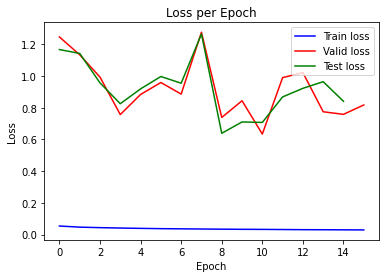

In [10]:
start_epoch = 1

plt.plot(loss_history_tr[start_epoch:], 'b-', label='Train loss')
plt.plot(loss_history_val[start_epoch:], 'r-', label='Valid loss')
plt.plot(loss_history_te[start_epoch:], 'g-', label='Test loss')
plt.title('Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [11]:
best_model.to(dev)

inputte=[]
labeltte=[]
outputte=[]
best_model.eval()
with torch.no_grad():
    sum_loss_te = 0 
    for idx, batch in tqdm(enumerate(test_dl), total=len(test_dl)):
        label = batch[2].to(device)
        inputte.append(batch[0].to(device))
        inp = batch[0].to(device)
        target = batch[1].to(device)

        if mdl=="TF" or mdl=="TF_PRETR":
            target_c=torch.zeros((target.shape[0],target.shape[1],1)).to(device)
            target=torch.cat((target,target_c),-1)
            start_of_seq = torch.Tensor([0, 1]).unsqueeze(0).unsqueeze(1).repeat(target.shape[0],1,1).to(device)
            src_att = torch.ones((inp.shape[0], 1,inp.shape[1])).to(device)
            dec_inp = start_of_seq
            for i in range(0,steps_out):
                trg_att = utils.subsequent_mask(dec_inp.shape[1]).repeat(dec_inp.shape[0], 1, 1).to(device)
                output = best_model(inp, dec_inp, src_att, trg_att)
                last_output = torch.cat((output[:,-1:,0].unsqueeze(2), torch.zeros_like(output[:,-1:,0].unsqueeze(2))), 2)
                dec_inp=torch.cat((dec_inp, last_output),1)
            preds = dec_inp[:, 1:, 0].unsqueeze(2) 
            outputte.append(preds)
            current_loss = loss_function(preds, label)
        elif mdl=="LSTM":
            output = best_model(inp.float(), target.float(), batch_size=batch_size, steps_in=steps_in, steps_out=steps_out, tf_prob=0)
            outputte.append(output)
            current_loss = loss_function(output, label)
        elif mdl=="TCN":
            output = best_model(inp.float(), target.float(), batch_size=batch_size, steps_in=steps_in, steps_out=steps_out, tf_prob=0)
            outputte.append(output)
            current_loss = loss_function(output, label)
        else:
            print("Experiment not valid. Chose TF or LSTM or TCN")

        labeltte.append(label)
        sum_loss_te += (current_loss.item()**2)*batch_size
    curr_te_loss = np.sqrt(sum_loss_te/len(test_dl))
    loss_history_te.append(curr_te_loss)
    print("curr_te_loss: ",curr_te_loss)

  0%|          | 0/125 [00:00<?, ?it/s]

curr_te_loss:  0.7073791436644746


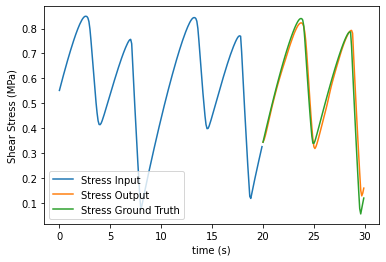

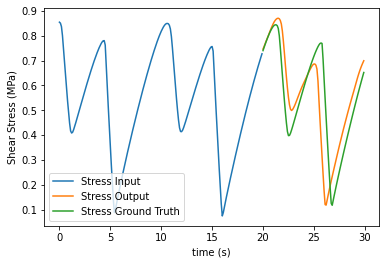

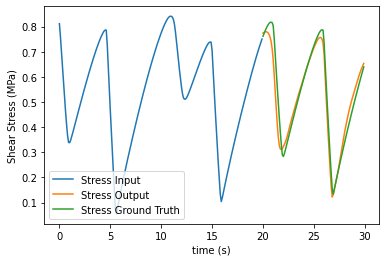

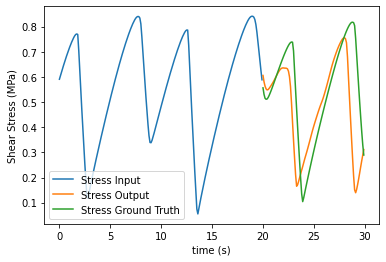

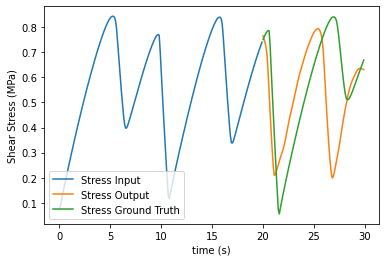

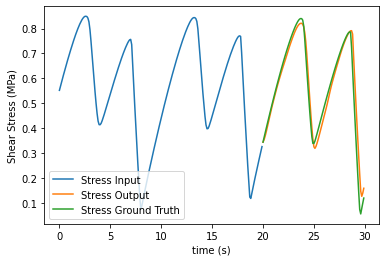

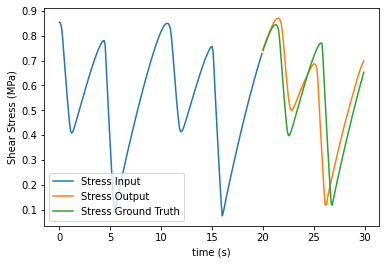

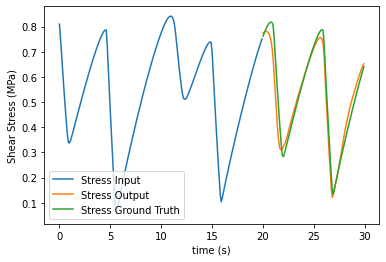

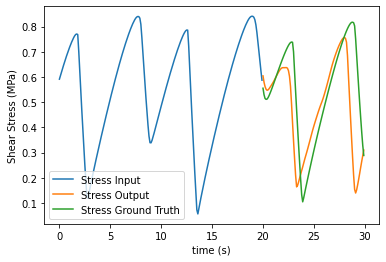

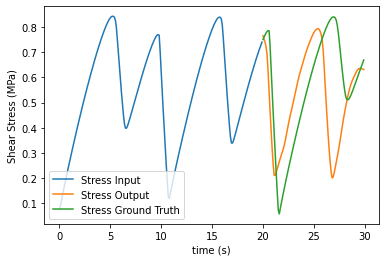

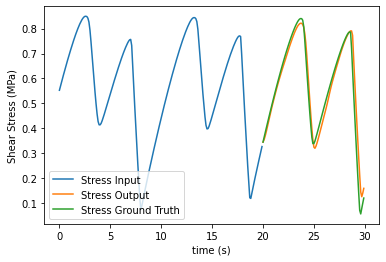

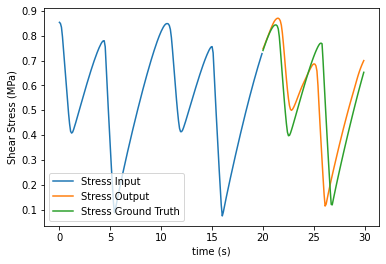

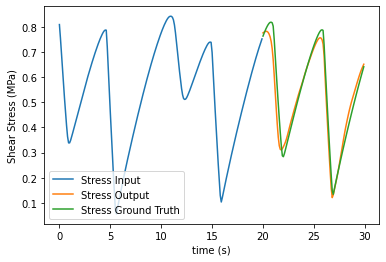

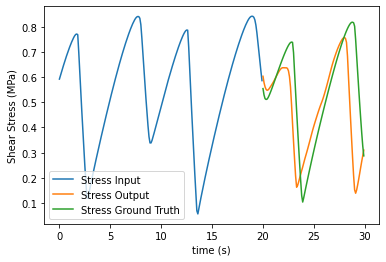

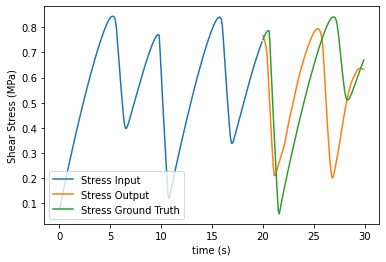

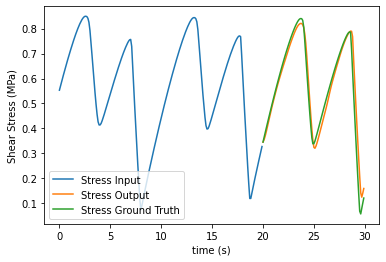

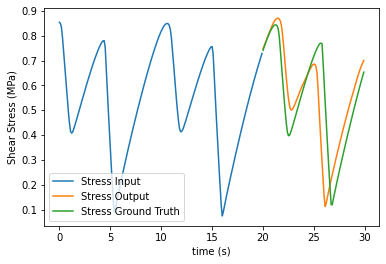

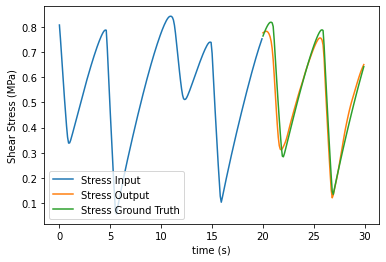

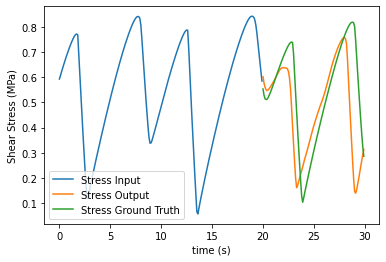

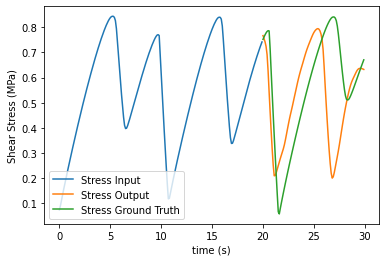

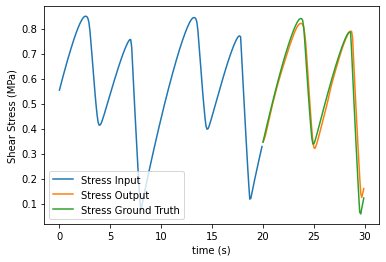

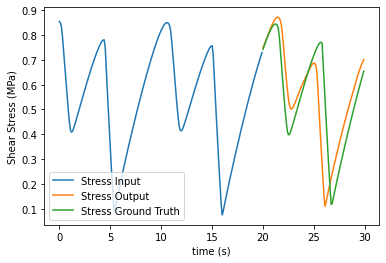

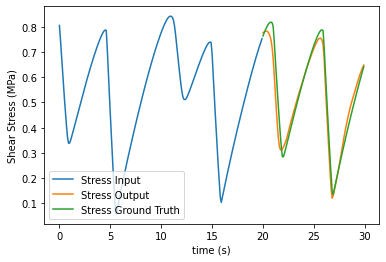

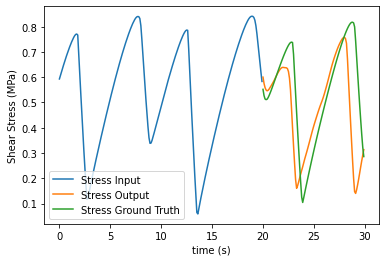

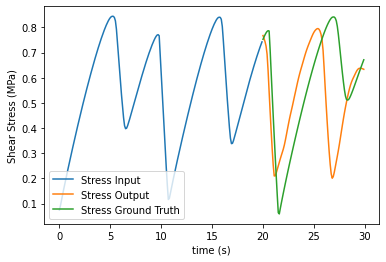

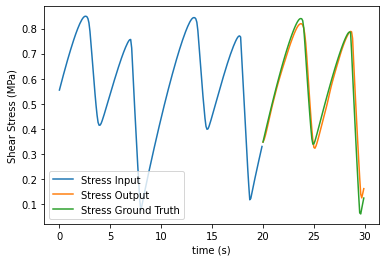

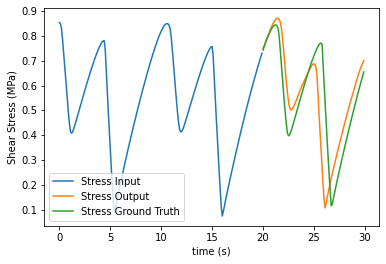

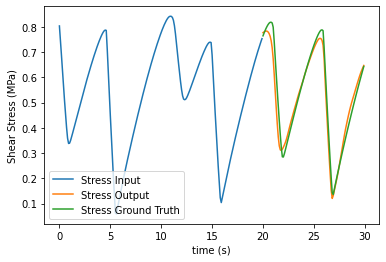

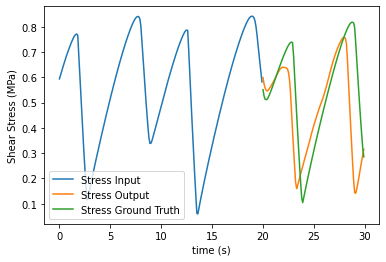

In [12]:
wndw=20
for btch in range(1,30):
    #img_name="p4581TRANSF_predicted_stepin_200_stepout_100_target_ShStress_window"+str(i)+".pdf"
    plt.plot([r*0.1 for r in range(0,steps_in)], inputte[btch][wndw].cpu(), label='Stress Input')
    plt.plot([r*0.1 for r in range(steps_in,steps_in+steps_out)], outputte[btch][wndw].cpu(), label='Stress Output')
    plt.plot([r*0.1 for r in range(steps_in,steps_in+steps_out)], labeltte[btch][wndw].cpu(), label='Stress Ground Truth')
    plt.xlabel('time (s)')
    plt.ylabel('Shear Stress (MPa)')
    plt.legend(loc='lower left')
    #plt.savefig(img_name)
    plt.show()

In [13]:
r_square_avg=0
rmse_square_avg=0
for w in range(len(outputte)):
  for b in range(0,batch_size):
    r_square = r2_score(outputte[w][b].cpu(), labeltte[w][b].cpu())
    rmse = sqrt(mean_squared_error(outputte[w][b].cpu(), labeltte[w][b].cpu()))
    r_square_avg+=r_square
    rmse_square_avg+=rmse
r_square_avg=r_square_avg/(len(outputte)*batch_size)
rmse_square_avg=rmse_square_avg/(len(outputte)*batch_size)

print("r_square_avg: ", r_square_avg," rmse_square_avg: ",rmse_square_avg)

r_square_avg:  0.5280167820838203  rmse_square_avg:  0.11061825052786735
